<h1> Stages of Pridictive Modeling </h1>
<ol>
    <li>Problem Defination</li>
    <li>Hypothesis Generation</li>
    <li>Data Extraction</li>
    <li>Data Exploration
        <ol>
            <li>Reading the data</li>
            <li>Variable Identification</li>
            <li>Univariate Analysis</li>
            <li>Bivariate Analysis</li>
            <li>Missing Value Treatment</li>
            <li>Outlier Treatment</li>
            <li>Variable Transformation</li>
        </ol>
    </li>
    <li>Pridictive Modeling</li>
    <li>Model Deployment</li>
</ol>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

<h2>Problem Defination</h2>
<p>It should start with 
    <ol> 
        <li>what you want to do?</li>
        <li>How you can do it?</li>
        <li>Figure out what is common in all the methods</li>
        <li>Predict the common variable</li>
    </ol>
</p>

<h2> Hypothesis Generation </h2>
<p>List down all possible variables that might influence objective free from any kind of bias. It should be done before looking at data to avoid bias, this also saves time and we will only look at data supporting or oposing hypothesis.<p>

<h2>Data Extraction</h2>
<p>Collection of data from various sources is done at this stage. New hypothesis may be developed after looking at this data.</p>


<h2> Data Exploaration </h2>
<p> One should know the data very well to modify it and apply techinques on it. without knowing the data thast well, we may apply wrong techniques or use wrong tools. Exploration involves following steps.
    <ol>
        <li>Reading the data</li>
        <li>Variable Identification</li>
        <li>Univariate Analysis</li>
        <li>Bivariate Analysis</li>
        <li>Missing Value Treatment</li>
        <li>Outlier Treatment</li>
        <li>Variable Transformation</li>
    </ol>
</p>

<h3>Reading Data</h3>
<p> Use pandas to read data and generate data frame</p>

In [3]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.shape

(891, 12)

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3>Variable Identification</h3>
<p>Identify predictor(independent) and target(dependent) variables, determine continuous and categorical variables.

In [5]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<h3>Univariate Analysis</h3>
<p> Analyse each variable one by one to identify anamolies and get insights. For categorical and continuous variable we use different techniques. </p>

<h4> Continuous variable analysis </h4>

In [6]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/home/jatin/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jatin/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


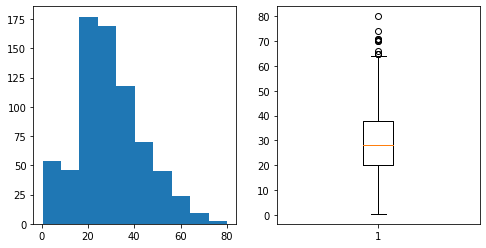

In [7]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
_ = ax[0].hist(titanic_data['Age'])
_ = ax[1].boxplot(titanic_data['Age'].dropna())

<h4> Categorical Varuiable analysis</h4>

In [8]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

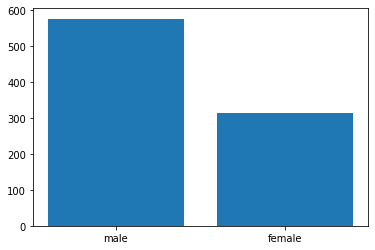

In [9]:
_ = plt.bar(titanic_data['Sex'].value_counts().index,titanic_data['Sex'].value_counts().values)

In [10]:
# table in percentage
titanic_data['Sex'].value_counts()/len(titanic_data['Sex'])

male      0.647587
female    0.352413
Name: Sex, dtype: float64

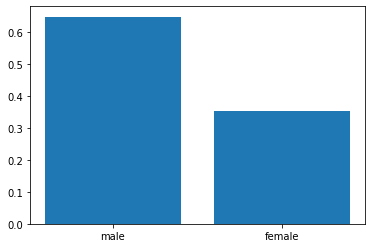

In [11]:
# Graphical in percentage
_ = plt.bar((titanic_data['Sex'].value_counts()/len(titanic_data['Sex'])).index,(titanic_data['Sex'].value_counts()/len(titanic_data['Sex'])).values)

<h3> Bivariate Analysis</h3>
<p> trying to understand relationship between 2 different variables, to see how they are associated. It helps in predictions, detection of anamolies and deviations from the data.</p>


<h4>Continuous - Continuous variable</h4>

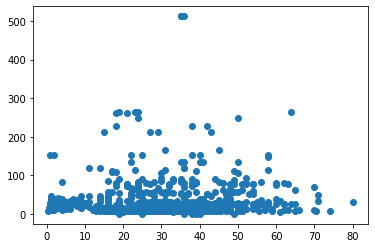

In [12]:
_ = plt.scatter(titanic_data['Age'], titanic_data['Fare'])

In [13]:
titanic_data['Age'].corr(titanic_data['Fare'])

0.0960666917690389

In [14]:
titanic_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<h4>Continuous-Categorical Variable</h4>

In [15]:
titanic_data.groupby('Sex').Age.mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

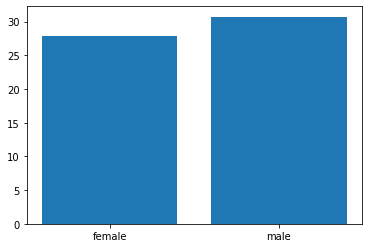

In [16]:
_ = plt.bar(titanic_data.groupby('Sex').Age.mean().index,titanic_data.groupby('Sex').Age.mean().values)

In [17]:
males = titanic_data[titanic_data['Sex']=='male']
females = titanic_data[titanic_data['Sex']=='female']
ttest_ind(males['Age'],females['Age'],nan_policy='omit')

Ttest_indResult(statistic=2.499206354920835, pvalue=0.012671296797014266)

<h4>Categorical-Categorical Analysis</h4>

In [18]:
pd.crosstab(titanic_data['Sex'],titanic_data['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [19]:
chi2_contingency(pd.crosstab(titanic_data['Sex'],titanic_data['Survived']))

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

<h3>Missing Value Treatment</h3>
<p>Data at times is missing because it is optional to provide, collected wrongly or read wrongly. There 3 kinds of missing data:
    <ol>
        <li>Missing Completely At Random(MCAR): Values missing independent of a any varible.</li>
        <li>Missing At Random(MAR): Values missing depending on a different variable.</li>
        <li>Missing Not At Random(MNAR): Values missing depending on the variable in which it is missing.</li>
    </ol>
</p>
<p>Missing values can be dealt with imputation or deletion methods. Imputation for continuous variable may be done using Mean, Median or Regression. Imputation for categorical variables can be done using mode and calssification. Deletion can be done either by deleting rows, or columns.</p>

In [20]:
titanic_data.shape

(891, 12)

In [21]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
titanic_data.dropna().isnull().shape

(183, 12)

In [24]:
titanic_data.dropna().isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [25]:
titanic_data['Age'].fillna(titanic_data.Age.mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [26]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h3> Outlier Treatment </h3>
<p> Outliers are values outside from usual range of data. This can be due to incorrect data entry, units, processing etc. Outliers can be identified using graphical(box & scatter plot) or formulae( x not in [Q1 - 1.5*IQR, Q3 + 1.5*IQR]. Outliers can be deleted, imputed, transformed or treated differently.</p>

<h4>Univariate Outlier Identification</h4>

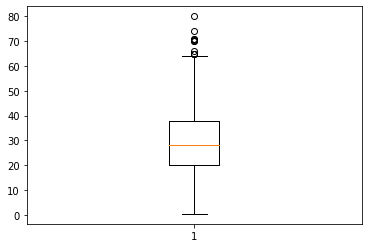

In [27]:
_ = plt.boxplot(titanic_data['Age'].dropna())

<h4>Bivariate Outlier Identification</h4>

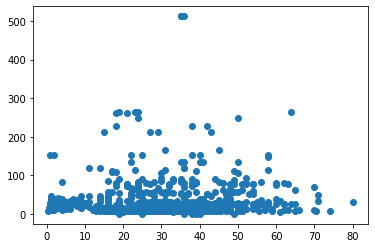

In [28]:
_ = plt.scatter(titanic_data['Age'],titanic_data['Fare'])

<h4>Removing/Replacing Outliers</h4>

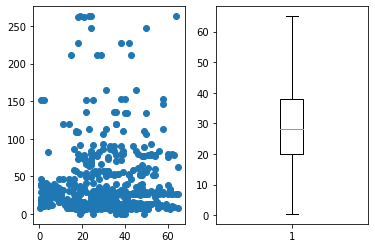

In [29]:
titanic_data = titanic_data[titanic_data['Fare']<300]
titanic_data.loc[titanic_data['Age']>65] = titanic_data.Age.mean()
fig, ax = plt.subplots(nrows=1, ncols=2)
_ = ax[0].scatter(titanic_data['Age'],titanic_data['Fare'])
_ = ax[1].boxplot(titanic_data['Age'].dropna())

<h3>Variable Transformation</h3>
<p> Variable transformation is a replacing a variable with a function of it or changing its relationship with other variables. It is done to change scale, non linear variables to linear, skewed to symetric. Some common transforms are log, square root, cube root, binning.</p>

/home/jatin/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jatin/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


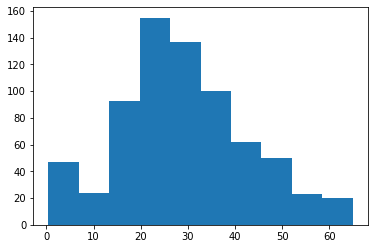

In [30]:
_ = plt.hist(titanic_data['Age'])

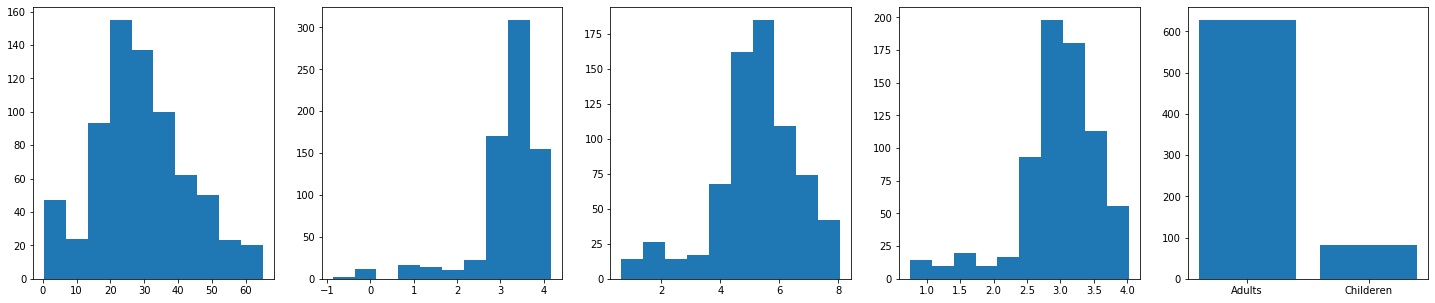

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=5,figsize=(25,5))
_ = ax[0].hist(titanic_data['Age'])
_ = ax[1].hist(np.log(titanic_data['Age']))
_ = ax[2].hist(np.sqrt(titanic_data['Age']))
_ = ax[3].hist(np.power(titanic_data['Age'],1/3))

titanic_data['Type'] = pd.cut(titanic_data['Age'],[0,15,80],labels=['Childeren','Adults'])
_ = ax[4].bar(titanic_data['Type'].value_counts().index,titanic_data['Type'].value_counts().values)

<h2> Pridictive Modeling</h2>
<p>Process of generating a mathematical model which can learn from previous data to make predictions. It involves algorithm selection, training of model, prediction using trained model and scoring.</p>
<p>Algorithms can be selected depending on type of problem(supervised/unsupervised), target variable(regression/classification). Following are some common algorthims:</p>

<h3> Linear Regression</h3>
This is common supervised learning method used in predictive analysis to predict a continuous variable. A line function is used to fit predictor variables to predict target value. A Cost function is then used to optimise the fit, this cost funtion is suare distance of actual and predicted value. Gradient descent is used to optimise cost function. To evaluate perfomance R<sup>2</sup> and Root Mean Sqaure Error(RMSE) methods are used.</p>

In [32]:
data = pd.read_csv('bigmart_data.csv')
data = pd.get_dummies(data)
data.shape

(8523, 1605)

In [33]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [34]:
#split test & train data
train_data = data[:7999]
test_data = data[8000:]
x_train = train_data.drop('Item_Outlet_Sales',axis=1)
y_train = train_data['Item_Outlet_Sales']
x_test = test_data.drop('Item_Outlet_Sales',axis=1)
true_val = test_data['Item_Outlet_Sales']

#Fill Null values
x_train.fillna(0,inplace=True)
x_test.fillna(0,inplace=True)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lreg = LinearRegression()

lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
pred = lreg.predict(x_test)
lreg.score(x_test,true_val)

0.40231937205686547

In [38]:
lreg.score(x_train,y_train)

0.6497748318392782

In [39]:
rmse_test = np.sqrt(np.mean(np.power(true_val-pred,2)))
rmse_train = np.sqrt(np.mean(np.power(y_train-lreg.predict(x_train),2)))
print(rmse_test,rmse_train)

1255.3479389145266 1013.0022436923714


Since RMSE test is greater, model is overfit

<h3>Logistic Regression</h3>

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

In [41]:
data = pd.read_csv('titanic.csv')
data.shape

(891, 12)

In [42]:
data.fillna(0,inplace=True)
data = pd.get_dummies(data)

In [43]:
x_train = data[:699].drop('Survived',axis=1)
y_train = data[:699]['Survived']
x_test = data[700:].drop('Survived',axis=1)
true_val = data[700:]['Survived']

In [44]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
logreg.score(x_test,true_val)

0.8219895287958116

In [46]:
logreg.score(x_train,y_train)

0.9213161659513591

In [47]:
pred= logreg.predict(x_test)
pred

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0])

<h3>Decision Tree</h3>

In [49]:
data = pd.read_csv('data_cleaned.csv')
data.shape

(891, 25)

In [50]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [52]:
x = data.drop('Survived', axis = 1)
y = data['Survived']

In [57]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,random_state=101,stratify=y)

In [60]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [63]:
clf.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
clf.score(train_x,train_y)

0.9880239520958084

In [65]:
clf.score(test_x,test_y)

0.7668161434977578

In [66]:
clf.predict(test_x)

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0])

<h3>Random Forest</h3>

<h3>K means</h3>

<h2> Model Deployment</h2>